# TUSHAR KUMAR
## Task 3 - Exploratory Data Analysis
## Trying to find out the weak areas where one can work to make profit. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Reading the Data

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### Basic Data Exploration

In [4]:
data.shape

(9994, 13)

In [5]:
data.info() #observing the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Exploring the Target Variable

In [7]:
data['Profit'].head(10) #observing the target variable

0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
5     14.1694
6      1.9656
7     90.7152
8      5.7825
9     34.4700
Name: Profit, dtype: float64

In [8]:
data.describe() #Desciptive analysis

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


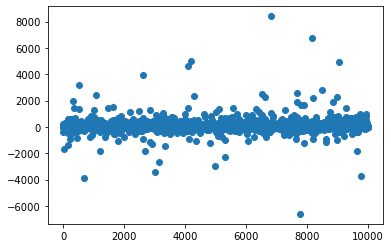

In [9]:
plt.scatter(x=range(0,len(data)), y=data['Profit']) # Visualizing the target variable

### Treating Duplicate Values, if any

In [10]:
data.duplicated().sum()

17

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().sum() # Duplicate values have been treated

0

### Treating missing values, if any

In [13]:
data.isnull().sum() # no missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Exploring the Independent Variables

In [14]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
data=data.drop(['Postal Code'],axis=1)

In [16]:
data=data.drop(['Country'],axis=1)

In [17]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


## Relationship Analysis

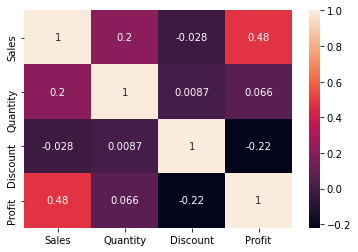

In [18]:
sns.heatmap(data.corr(), annot=True) 

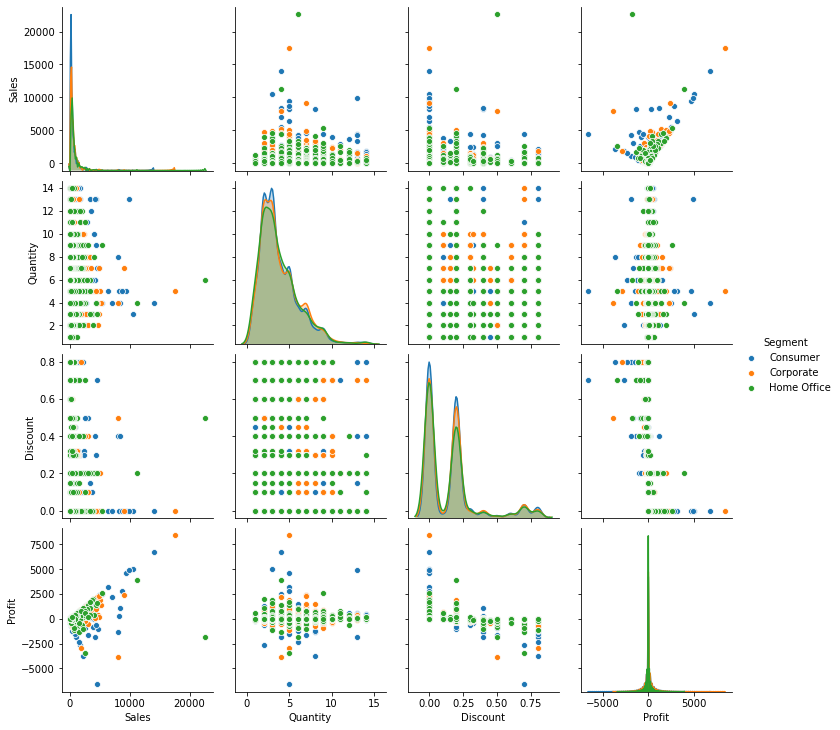

In [19]:
sns.pairplot(data, hue='Segment')

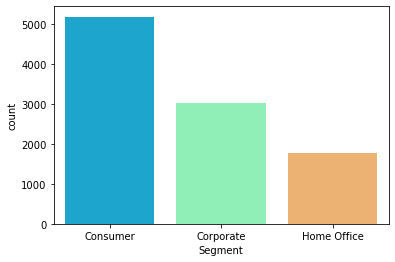

In [20]:
sns.countplot(x=data['Segment'], palette='rainbow')

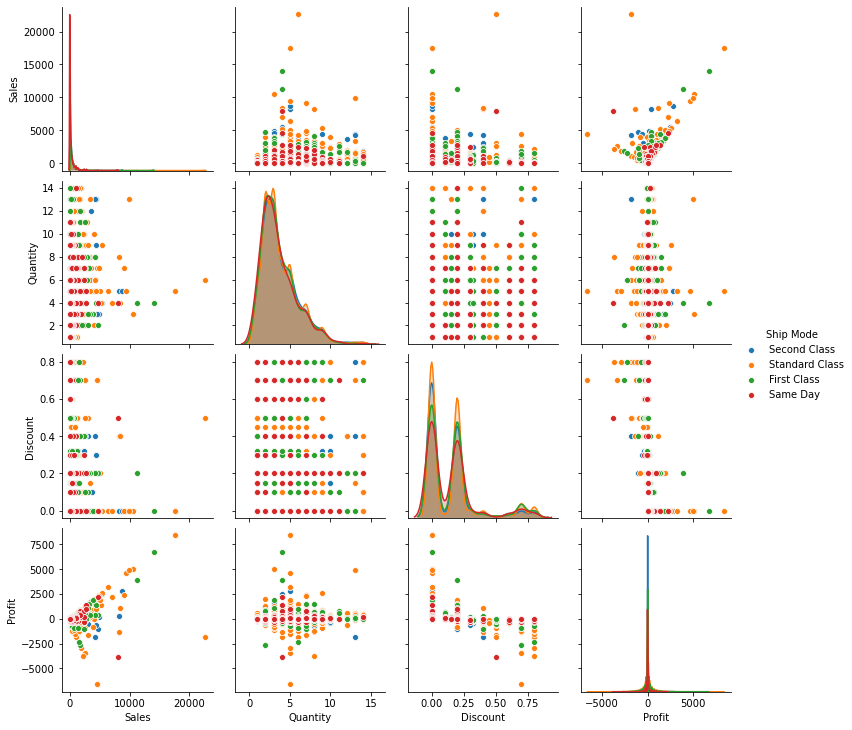

In [21]:
sns.pairplot(data, hue='Ship Mode')

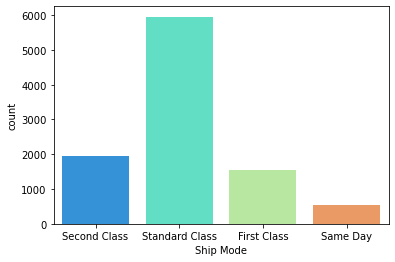

In [22]:
sns.countplot(x=data['Ship Mode'], palette='rainbow')

In [23]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

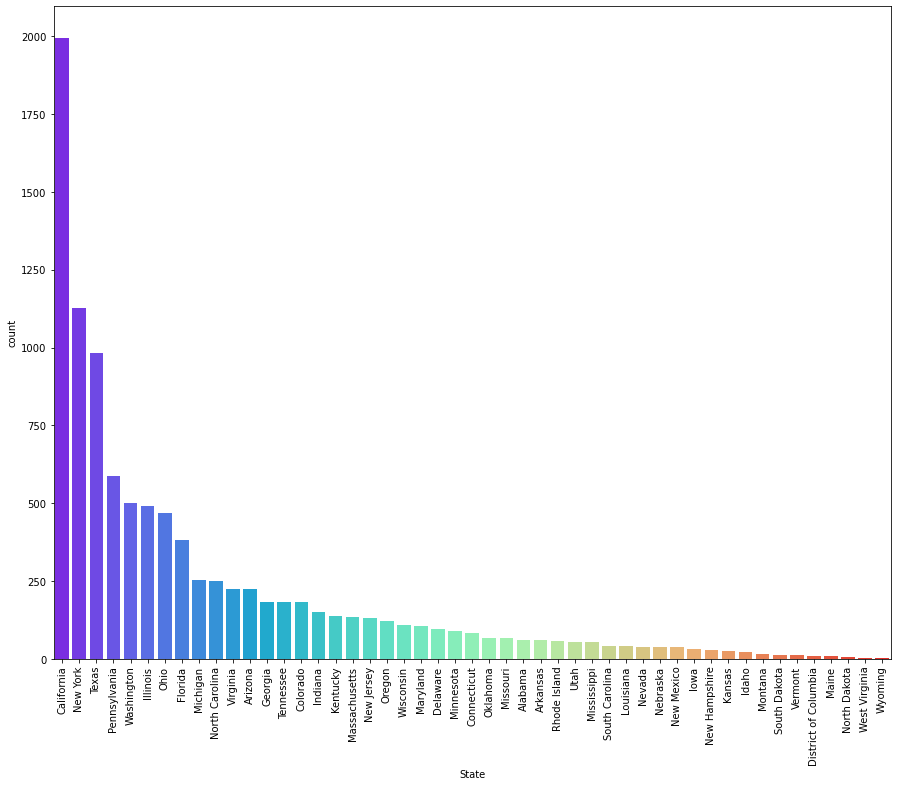

In [24]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=data,palette='rainbow',order=data['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### • We can see that California, New York and Texas have maximum number of buyers.

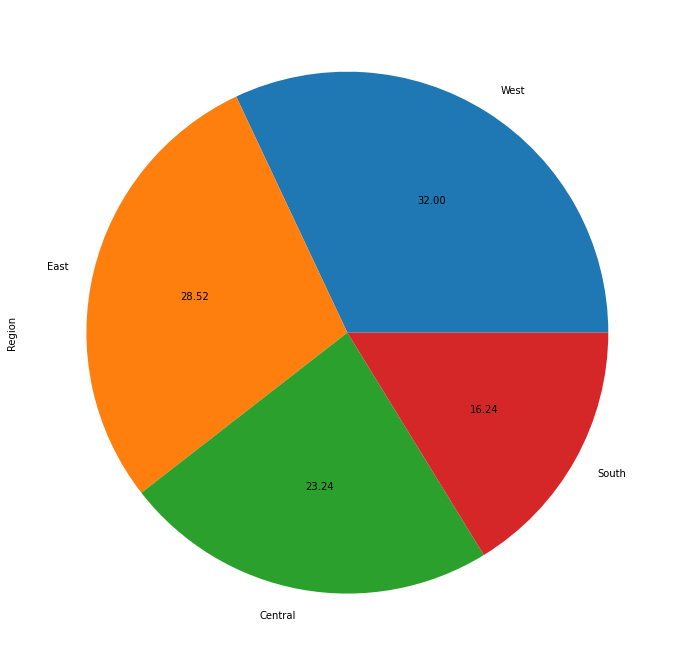

In [25]:
plt.figure(figsize=(15,12))
data['Region'].value_counts().plot.pie(autopct='%.2f')
plt.show()

In [26]:
data['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

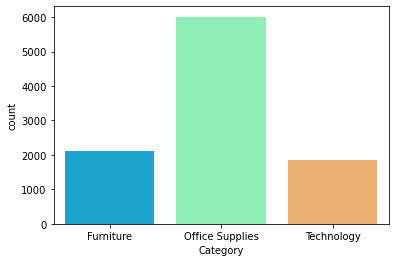

In [27]:
sns.countplot(x=data['Category'], palette='rainbow')

### • Office Supplies Category has highest sale

In [28]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

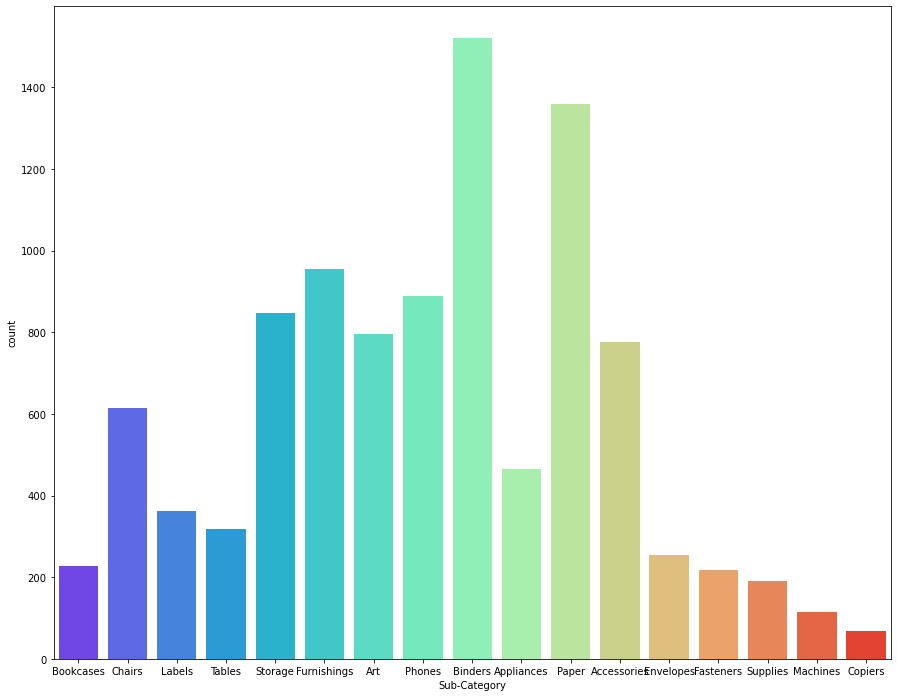

In [29]:
plt.figure(figsize=(15,12))
sns.countplot(x=data['Sub-Category'], palette='rainbow')

### • Binders and paper have highest numbers followed by Storage, Furnishings, Art, Phones, Accessories

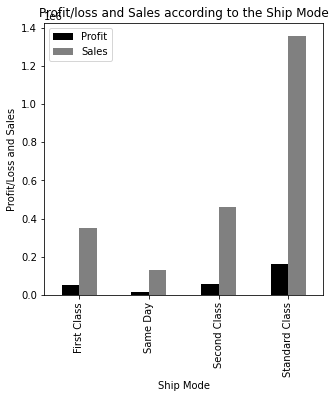

In [30]:
data.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=['black','grey'],figsize=(5,5))
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/loss and Sales according to the Ship Mode')
plt.show()

### • Most of the Profit and Sales are through Standard Ship Mode

In [ ]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['black','grey'],figsize=(5,5))
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/loss and Sales according to the Segment')
plt.show()

### • Consumer gives maximum profit and sales whereas Home Office gives minimum

In [ ]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['black','grey'],figsize=(5,5))
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/loss and Sales according to the Region')
plt.show()

### • Maximum are from East and West Region

In [ ]:
data.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['black','grey'],figsize=(10,8))
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/loss and Sales according to the Category')
plt.show()

### • Technology offers maximum profit and sales followed by Office Supplies

In [ ]:
data.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['black','grey'],figsize=(10,8))
plt.ylabel('Profit/Loss and Sales')
plt.title('Profit/loss and Sales according to the Sub-Category')
plt.show()

### • Highest sales are of Phones, Chairs and Storage, whereas, highest profit is from Phones, Accessories, Copiers and somewhat Paper and Binders

In [ ]:
data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False).plot.bar(color=['black','grey'],figsize=(15,8))
plt.title('Profit/loss and Sales according to the States')
plt.xlabel('States')
plt.ylabel('Profit/loss and Sales')
plt.show()

### • Maximum Sales and Profit are from California and New York, whereas, maximum loss in from Texas, Pennsylvania and Ohio

##  As a business manager I would recommend following points in order to increase profit and minimize loss :-
### 1. Increase supply in California and New York.
### 2. Maximum deliveries are made through Standard Ship Mode.
### 3. Maximum sales are made to Consumer Segment followed by Corporate.
### 4. Focus on West and East Regions.
### 5. Increase Technology sales followed by Office Supplies.
### 6. Focus on increasing sale of Phones, Accessories, Copiers and somewhat Paper and Binders.